# Risk assessment for HAZARD

- A workflow from the CLIMAAX [Handbook](https://handbook.climaax.eu/) and [HAZARD](https://github.com/CLIMAAX/HAZARD) GitHub repository.
- See our [how to use risk workflows](https://handbook.climaax.eu/notebooks/workflows_how_to.html) page for information on how to run this notebook.

## Risk assessment methodology

Mention which type of risk assessment method you are using as in the file Risk_workflow_description. In this file you have to report the link to the hazard script in case someone wants to perform their own hazard assessment and/or provide access to pre-calculated hazard maps. 

Describe which data on exposure and vulnerability you are going to use as input (with sources). Describe where the data can be found, is there an API to download it or the files can be downloaded from some data repository. Provide a link to the repository (as DOI if possible).

Clearly describe what will be the outputs of this workflow (which indices, in which form).

For default hazard maps, describe their accuracy and applicability for local contexts.

## Preparation work

### Select area of interest
Before accessing the data we will define the area of interest. Before starting with this workflow, you have already prepared by downloading the coastal flood hazard map to your local directory (using the hazard assessment workflow for coastal flooding or using your own data). Please specify below the area name for the coastal flood maps.

[NOTE: we will need to change this when we have hazard maps available on a server]

In [1]:
areaname = 'La_Rochelle' 

### Load libraries

`````{admonition} Find more info about the libraries used in this workflow here 👆
:class: hint dropdown

In this notebook we will use the following Python libraries:
- [os](https://docs.python.org/3/library/os.html) - To create directories and work with files
- [pooch](https://www.fatiando.org/pooch/latest/index.html) - To download and unzip the data
- [xarray](https://docs.xarray.dev/en/stable/) - To process the data and prepare it for damage calculation
- [rioxarray](https://corteva.github.io/rioxarray/stable/) - Rasterio xarray extension - to make it easier to use GeoTIFF data with xarray
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/) - To plot the maps
- [matplotlib](https://matplotlib.org/) - For plotting as well
`````

In [2]:
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
#import pooch
import xarray as xr

### Create the directory structure
In order for this workflow to work even if you download and use just this notebook, we need to set up the directory structure.  
Next cell will create the directory called 'my_workflow' in the same directory where this notebook is saved.


:::{tip} Don't forget!
Replace **my_workflow** with the workflow name and delete this note
:::


In [ ]:
workflow_folder = 'my_workflow'
os.makedirs(workflow_folder, exist_ok=True)

### Download and explore the data

**You can keep the text below if you want to use pooch for downloading. Otherwise add a text about the API and delete the pooch bit.**

The data we are using is available as compressed ZIP files in the JRC data portal. 
Since there is no API to download this data, we can use **[pooch](https://www.fatiando.org/pooch/latest/index.html)** library to donwload and unzip the data.  

Pooch will check if the zip file already exists by comparing the hash of the file with what is stored in the default and only download it if it is not already there.

In [ ]:
data_folder = os.path.join(workflow_folder, 'data')
os.makedirs(data_folder, exist_ok=True)

Note that now we have a directory **my_workflow/data** where all the zip files and unzipped flood files are.  
We can list all the files in the **data_dir** using the os library.  

In [ ]:
with os.scandir(data_folder) as entries:
    for entry in entries:
        print(entry.name)

#### type of data (hazard/exposure/vulnerability)
First we need the information on land use. We will download it from the JRC data portal.
:::{tip} Here's an example of the text and code
Once the data is downloaded and unzipped, Pooch will list the content of the directory with the data.

```python
url = 'https://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/LUISA/PrimaryOutput/Europe/REF-2014/JRC_LUISA_Output_land_use_ref_2014.zip'
pooch.retrieve(
    url=url,
    known_hash=None,
    path=data_dir,
    processor=pooch.Unzip(extract_dir='')
)
```

:::

## Explore the data
Now that we have downloaded and unpacked the needed data, we can have a look what is inside.  

### Some data I
Add text about your data here.

Explain the folder structure and file names.

All the downloaded files are stored in our **data_dir** folder, with filenames starting with: ...  
First we can explore one of them.

:::{tip} Explore the file content
Fell free to explore the content and structure of the datasets.  
Note the coordinates, dimensions and attributes!
:::

:::{hint} Find the information about spatial references, statistics👆 (click)
:class: dropdown
👋 Click on **spatial_ref** 📄 _show/hide attributes_ to see the spatial information  
👋 Look at _STATISTICS_ attributes to find minimum, maximum and other statistics

:::

In [ ]:
# code here to open and show the data
hazard_data = xr.open_dataset("...")

### Some data II
Add text about other dataset you are using here.  

If there are more files in the directory, you can list the directory and explain what is what.

In [ ]:
#with os.scandir(f'{data_dir}/other_data') as entries:
#    for entry in entries:
#        print(entry.name)

Let's explore one of the dataset files, for example this one...  
Write which library is used, especially if it is different from other datasets.

In [ ]:
# code here to open and show the data

## Processing the data

Explain why the processing is needed. For example:
- if the data is global, we might need to crop all the datasets to the area of interest, set the coordinates of the bounding box in a separate cell
- if datasets have different resolution and projection we need to reproject one of them and interpolate to the same resolution in order to be able to do computations.
- try to use areas of one of the pilots in the examples

Explain which libraries are used in this step and why.

:::{tip} Here's an example text:

If we have a closer look at the x and y dimensions of the datasets, we can see that the data has different resolutions. Flood extent maps are at 100 m resolution, while land use data is at 1km. We can use xarray to get them to the same resolution.  

But first we need to clip them to the same area, so we don't interpolate the whole global field.   

For this we use the rioxarray library again.  
**minx** and **maxx** are longitudes, and **miny** and **maxy** are latitudes of the bounding box.  

In this example we are clipping the bounding box around city of Zilina in Slovakia.
:::

In [ ]:
# code cell with processing

#### Explanation of the processing step I

Explain the processing step, what library is used and why.  
Try to include links to the documentation about the functions you are using.

:::{tip} Here's an example text:
#### Interpolate the land use data array

Next we need to interpolate the land use data into the flood map grid in order to be able to calculate the damage map.  
We can use the xarray [**interp_like()**](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.interp_like.html) function, that will interpolate the land use data into flood grid.  

Since we don't really want interpolate the values, we are using method **'nearest'**, to assing the values of the nearest grid points.

:::

In [ ]:
# code cell with processing, for example:
#flood_200_small_area_1km  = flood_200_small_area.interp_like(land_use_small_area, method='nearest')
#flood_200_small_area_1km

You may include a simple plot to quickly visualise the result. But make sure to explain what is plotted

In [ ]:
#flood_200_small_area_1km.plot()

## Calculate the indices

Calculating some indices using the processed data is often part of the workflow. 

- Explain here what is calculated, include the links to the documentation about the methond.
- Explain what libraries are used and include link to the documentation
- Explain clearly what input fields are
- Explain which functions are used and possibly their parameters
- Explain what the output is

In [ ]:
# code for the calculation

In [ ]:
# another code cell

## Plot the results

Plot the results. Explain what libray is used and provide the link if it is not already there.

If the plotting code is large, break it into more cells and explain each part.

Text(0.5, 1.0, 'Risk map for La_Rochelle')

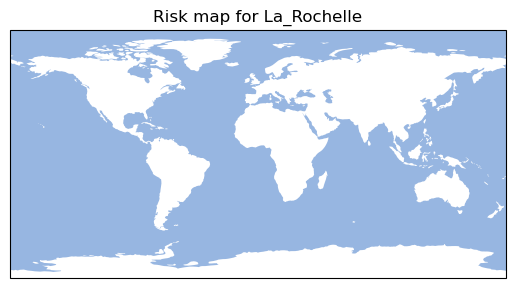

In [3]:
PLATE = ccrs.PlateCarree()

fig, ax = plt.subplots(1, 1, subplot_kw={ "projection": PLATE })
ax.add_feature(cfeature.OCEAN)
ax.set_title(f"Risk map for {areaname}")

## Conclusions

Some text about conclusions and lessons learned. Discuss limitations and applicability.

## Contributors
authors, links to libraries documentation, references etc